In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

/kaggle/input/resnet/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/image-data/5.jpg
/kaggle/input/image-data/0.jpg
/kaggle/input/image-data/9.png
/kaggle/input/image-data/1.jpg
/kaggle/input/image-data/354.jpg
/kaggle/input/image-data/5.png
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/369.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/355.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/377.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/366.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/359.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/361.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/380.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/379.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/375.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/396.jpg
/kaggle/input/face-mask-types-dataset/Dataset/test/n95/362.jpg
/kaggle/input/face-mask-types-data

In [2]:
import matplotlib.pyplot as plt



In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2

In [4]:
train_dir = '/kaggle/input/face-mask-types-dataset/Dataset/train'
test_dir = '/kaggle/input/face-mask-types-dataset/Dataset/test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 1956 images belonging to 5 classes.
Found 330 images belonging to 5 classes.


# ResNETV2

In [17]:
# Define the InceptionResNetV2 model as the base model
weights_path = '/kaggle/input/resnet/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = InceptionResNetV2(include_top=False, weights=weights_path, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

In [18]:
model = Model(inputs=base_model.input, outputs=predictions)

In [19]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [21]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
62/62 [==============================] - 280s 4s/step - loss: 0.8338 - accuracy: 0.6697 - val_loss: 0.6474 - val_accuracy: 0.7333
Epoch 2/10
62/62 [==============================] - 257s 4s/step - loss: 0.5391 - accuracy: 0.7950 - val_loss: 0.5603 - val_accuracy: 0.7788
Epoch 3/10
62/62 [==============================] - 258s 4s/step - loss: 0.4932 - accuracy: 0.8206 - val_loss: 0.5550 - val_accuracy: 0.7606
Epoch 4/10
62/62 [==============================] - 257s 4s/step - loss: 0.4905 - accuracy: 0.8119 - val_loss: 0.5001 - val_accuracy: 0.8242
Epoch 5/10
62/62 [==============================] - 260s 4s/step - loss: 0.4627 - accuracy: 0.8211 - val_loss: 0.4770 - val_accuracy: 0.8394
Epoch 6/10
62/62 [==============================] - 257s 4s/step - loss: 0.4048 - accuracy: 0.8451 - val_loss: 0.4806 - val_accuracy: 0.8152
Epoch 7/10
62/62 [==============================] - 260s 4s/step - loss: 0.4081 - accuracy: 0.8497 - val_loss: 0.5064 - val_accuracy: 0.8061
Epoch 8/10
62

In [22]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

11/11 [==============================] - 36s 3s/step - loss: 0.6053 - accuracy: 0.7576
Test accuracy: 0.7575757503509521


In [23]:
# Saving the model
model.save('face_mask_classification.h5')

# Mobile Net

In [11]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the MobileNet model as the base model
weights_path = '/kaggle/input/mobilenet-h/mobilenet_1_0_224_tf_no_top.h5'
#base_model = MobileNet(input_shape=(224, 224, 3), weights='MobileNet', include_top=False)
base_model = MobileNet(input_shape=(224, 224, 3), weights= weights_path, include_top=False)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc) 


Epoch 1/10
62/62 [==============================] - 81s 1s/step - loss: 0.8594 - accuracy: 0.6662 - val_loss: 0.5899 - val_accuracy: 0.7727
Epoch 2/10
62/62 [==============================] - 72s 1s/step - loss: 0.4560 - accuracy: 0.8257 - val_loss: 0.4779 - val_accuracy: 0.8394
Epoch 3/10
62/62 [==============================] - 72s 1s/step - loss: 0.4150 - accuracy: 0.8328 - val_loss: 0.4242 - val_accuracy: 0.8364
Epoch 4/10
62/62 [==============================] - 72s 1s/step - loss: 0.3356 - accuracy: 0.8773 - val_loss: 0.4346 - val_accuracy: 0.8545
Epoch 5/10
62/62 [==============================] - 72s 1s/step - loss: 0.2914 - accuracy: 0.8906 - val_loss: 0.3710 - val_accuracy: 0.8667
Epoch 6/10
62/62 [==============================] - 74s 1s/step - loss: 0.2666 - accuracy: 0.9003 - val_loss: 0.3432 - val_accuracy: 0.8697
Epoch 7/10
62/62 [==============================] - 72s 1s/step - loss: 0.2779 - accuracy: 0.8983 - val_loss: 0.3133 - val_accuracy: 0.8848
Epoch 8/10
62/62 [==

In [12]:
model.save('face_mask_classification_using_MobileNet.h5')

# Using VGG net

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Define the VGG16 model as the base model
weights_path = '/kaggle/input/vgg-16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model = VGG16(input_shape=(224, 224, 3), weights=weights_path, include_top=False)

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc) 


Epoch 1/10
62/62 [==============================] - 702s 11s/step - loss: 1.4785 - accuracy: 0.3737 - val_loss: 1.3251 - val_accuracy: 0.4606
Epoch 2/10
62/62 [==============================] - 651s 11s/step - loss: 1.2021 - accuracy: 0.5608 - val_loss: 1.1873 - val_accuracy: 0.5515
Epoch 3/10
62/62 [==============================] - 655s 11s/step - loss: 1.0649 - accuracy: 0.6084 - val_loss: 1.0821 - val_accuracy: 0.5970
Epoch 4/10
62/62 [==============================] - 656s 11s/step - loss: 0.9611 - accuracy: 0.6478 - val_loss: 1.0377 - val_accuracy: 0.5939
Epoch 5/10
62/62 [==============================] - 655s 11s/step - loss: 0.9082 - accuracy: 0.6554 - val_loss: 0.9538 - val_accuracy: 0.6364
Epoch 6/10
62/62 [==============================] - 703s 11s/step - loss: 0.8524 - accuracy: 0.6800 - val_loss: 0.9534 - val_accuracy: 0.6273
Epoch 7/10
62/62 [==============================] - 651s 11s/step - loss: 0.8276 - accuracy: 0.6963 - val_loss: 0.9232 - val_accuracy: 0.6485
Epoch 

In [14]:
model.save('face_mask_classification_using_VGG16.h5')

# Comparision between ResNet Vs MobileNet Vs VGG16

In [3]:
model_resNet = tf.keras.models.load_model('face_mask_classification_ResNet.h5')
model_MobileNet = tf.keras.models.load_model('face_mask_classification_using_MobileNet.h5')
model_VGG16 = tf.keras.models.load_model('face_mask_classification_using_VGG16.h5')

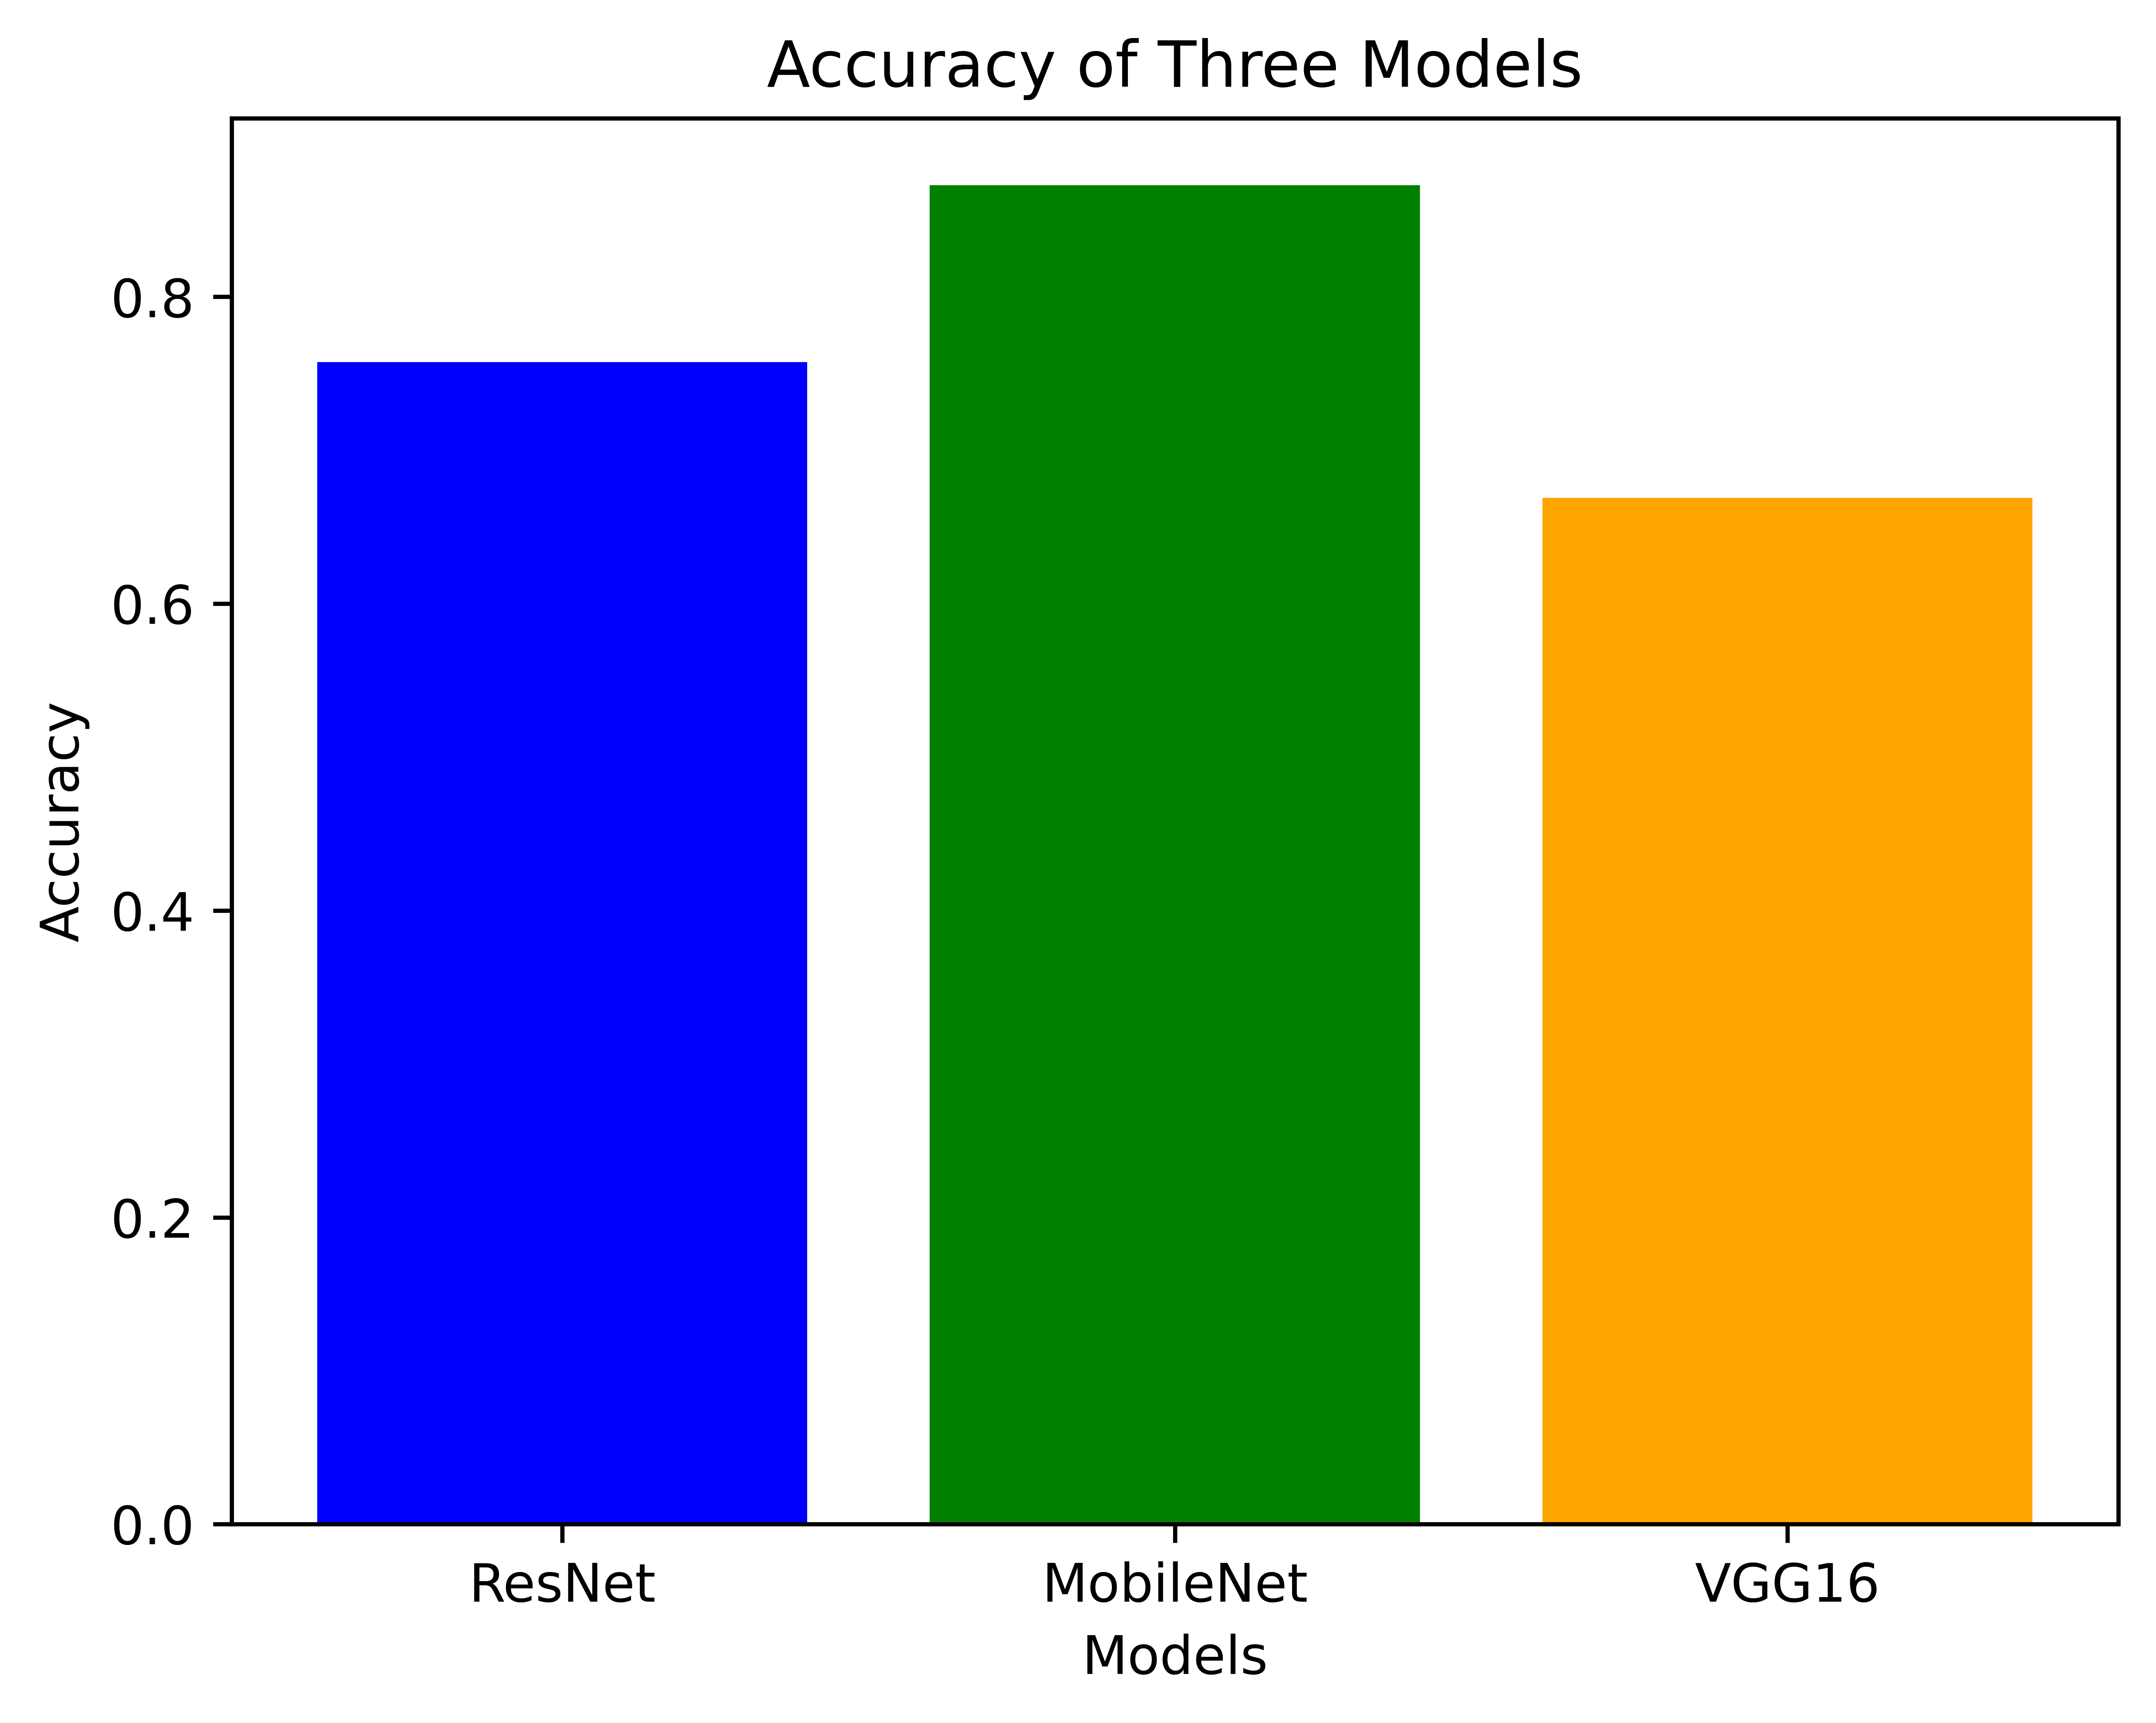

In [9]:
import matplotlib.pyplot as plt
plt.figure(dpi=1000)
# Replace these values with the actual accuracy values of your models
models = ['ResNet', 'MobileNet', 'VGG16']
accuracies = [0.7575, 0.8727, 0.669]

# Create a bar plot
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Three Models')


plt.savefig("output.jpg",)

In [61]:
# Load the image and preprocess it
img = cv2.imread("/kaggle/input/image-data/0.jpg")
img = cv2.resize(img, (224, 224))
img_array = np.expand_dims(img, axis=0)
img_array = img_array.astype('float32') / 255.0

In [29]:
prediction = model.predict(img_array)

1/1 [==============================] - 5s 5s/step


1/1 [==============================] - 0s 188ms/step


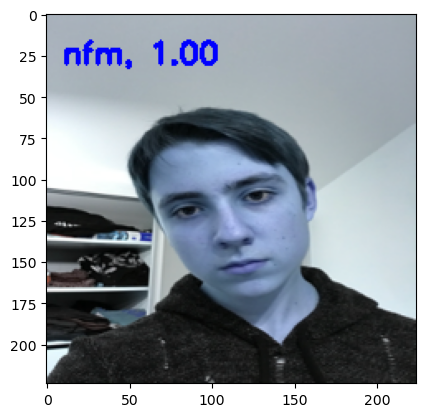

In [64]:
# Load the image and preprocess it
img = cv2.imread("/kaggle/input/image-data/9.png")
img = cv2.resize(img, (224, 224))
img_array = np.expand_dims(img, axis=0)
img_array = img_array.astype('float32') / 255.0

prediction = model.predict(img_array)

# Get the predicted class and probability
class_names = ['cloth', 'n95', 'n95v', 'nfm', 'srg'] # replace with your class names
predicted_class = class_names[np.argmax(prediction)]
predicted_prob = np.max(prediction)
# Draw the predicted class and probability on the image
#img = cv2.imread("/kaggle/input/image-data/1.jpg")
cv2.putText(img, f'{predicted_class}, {predicted_prob:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Display the input image and predicted class
plt.imshow(img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()